<a href="https://colab.research.google.com/github/GuilhermeFernandez/Telecom_X/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [69]:
import pandas as pd

#Extrai os dados do JSON, depois fiz a união dos dataframes normalizados novamente:
dados_telecomx = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json')
dados_customer = pd.json_normalize(dados_telecomx['customer'])
dados_phone = pd.json_normalize(dados_telecomx['phone'])
dados_internet = pd.json_normalize(dados_telecomx['internet'])
dados_account = pd.json_normalize(dados_telecomx['account'])
dados_telecomx.drop(['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)


dados_telecomx = dados_telecomx.join([dados_customer, dados_phone, dados_internet, dados_account])

In [70]:
dados_telecomx

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformação

churn, gender, dependents, partner, charges.monthly, charges.total.
Multiplelines tem relação com ter dependentes ou parceiro?

In [71]:
import numpy as np

#Passando "Charges.Total" para float64 e checando valores nulos:
dados_telecomx['Charges.Total'] = dados_telecomx['Charges.Total']\
              .replace(' ','NaN')\
              .astype(np.float64)\
              .dropna()

print(dados_telecomx['SeniorCitizen'].isnull().sum())
print(dados_telecomx['Charges.Monthly'].isnull().sum())

#Verificando se tem repetição no "customerID":
print(len(dados_telecomx['customerID'].unique()))

#Criando coluna de contas diárias, onde está o gasto diário do cliente:
dados_telecomx['Contas_diarias'] = dados_telecomx['Charges.Monthly'].apply(lambda x: np.round(x / 30, decimals=2))




0
0
7267


In [72]:
#Binarizando colunas com "Sim" e "Não" de interesse:

dados_telecomx_binarios = dados_telecomx
dados_telecomx_binarios['Partner'] = dados_telecomx_binarios['Partner'].apply(lambda x: True if x == 'Yes' else False)
dados_telecomx_binarios['Dependents'] = dados_telecomx_binarios['Dependents'].apply(lambda x: True if x == 'Yes' else False)
dados_telecomx_binarios['MultipleLines'] = dados_telecomx_binarios['MultipleLines'].apply(lambda x: True if x == 'Yes' else False)
dados_telecomx_binarios['Churn'] = dados_telecomx_binarios['Churn'].apply(lambda x: True if x == 'Yes' else False)
dados_telecomx_binarios

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_diarias
0,0002-ORFBO,False,Female,0,True,True,9,Yes,False,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,False,Male,0,False,False,9,Yes,True,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,False,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,True,Male,1,True,False,13,Yes,False,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,False,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,0,False,False,13,Yes,False,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,True,Male,0,True,False,22,Yes,True,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,False,Male,0,False,False,2,Yes,False,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,False,Male,0,True,True,67,Yes,False,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


#📊 Carga e análise

In [73]:
#Dados básicos e percentuais:

dados_basicos = dados_telecomx_binarios.describe()
porcentagem_parceiros = 100 * np.round(dados_telecomx_binarios['Partner'].sum() / 7267, decimals=2)
porcentagem_dependentes = 100 * np.round(dados_telecomx_binarios['Dependents'].sum() / 7267, decimals=2)
porcentagem_desistencia = 100 * np.round(dados_telecomx_binarios['Churn'].sum() / 7267, decimals=2)


print(f'A porcentagem de clientes com parceiros é de {porcentagem_parceiros}%')
print(f'A porcentagem de clientes com dependentes é de {porcentagem_dependentes}%')
print(f'A porcentagem de clientes que abandonaram o serviço é de {porcentagem_desistencia}%')

A porcentagem de clientes com parceiros é de 48.0%
A porcentagem de clientes com dependentes é de 30.0%
A porcentagem de clientes que abandonaram o serviço é de 26.0%


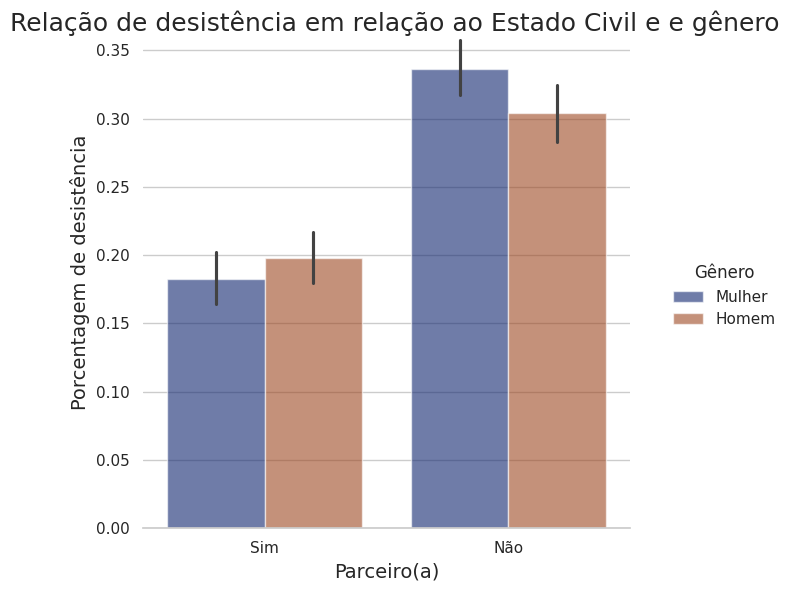

In [74]:
#Visualização:
import matplotlib.pyplot as plt
import seaborn as sns

dados_telecomx_binarios['Partner'] = dados_telecomx_binarios['Partner'].apply(lambda x: "Sim" if x == True else "Não")
dados_telecomx_binarios['gender'] = dados_telecomx_binarios['gender'].apply(lambda x: "Homem" if x == 'Male' else "Mulher")

sns.set_theme(style='whitegrid')
p = sns.catplot(kind='bar', data=dados_telecomx_binarios, x='Partner', y='Churn', hue='gender', palette="dark", alpha=.6, height=6)
p.fig.suptitle('Relação de desistência em relação ao Estado Civil e e gênero', fontsize=18)


#ax.set_title('Desistência em relação à estado civil', fontsize=16);
p.set_axis_labels("Parceiro(a)", "Porcentagem de desistência", fontsize=14)
p.legend.set_title("Gênero")
p.savefig('estadocivilegenero.png', dpi=300)

p.despine(left=True)
plt.show()

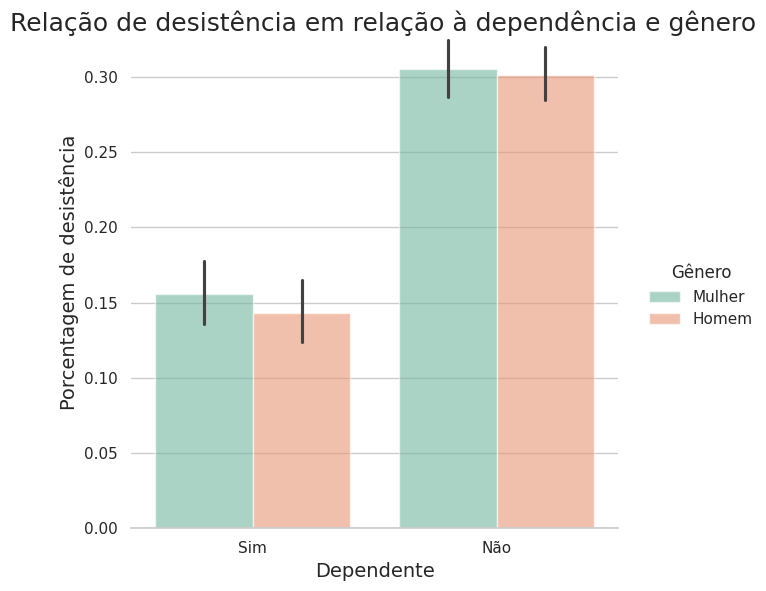

In [75]:
dados_telecomx_binarios['Dependents'] = dados_telecomx_binarios['Dependents'].apply(lambda x: "Sim" if x == True else "Não")

sns.set_theme(style='whitegrid')
p = sns.catplot(kind='bar', data=dados_telecomx_binarios, x='Dependents', y='Churn', hue='gender', palette="Set2", alpha=.6, height=6)
p.fig.suptitle('Relação de desistência em relação à dependência e gênero', fontsize=18)

p.set_axis_labels("Dependente", "Porcentagem de desistência", fontsize=14)
p.legend.set_title("Gênero")
p.savefig('dependenciagenero.png', dpi=300)

p.despine(left=True)
plt.show()

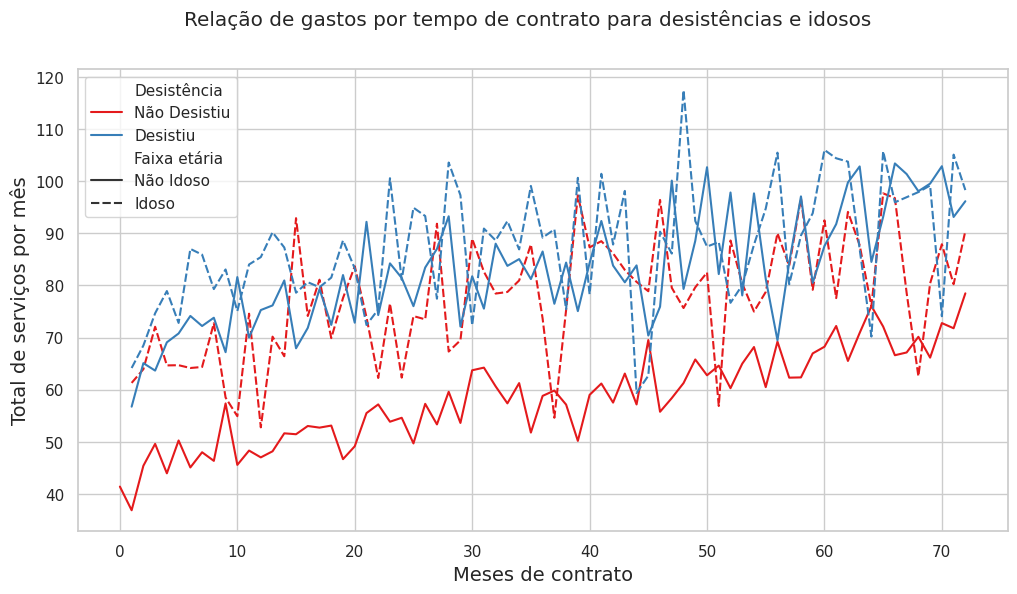

In [76]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(y="Charges.Monthly", x="tenure",
             hue="Churn", style="SeniorCitizen",
             data=dados_telecomx, palette='Set1', errorbar=None)
ax.figure.suptitle('Relação de gastos por tempo de contrato para desistências e idosos')
ax.set_xlabel('Meses de contrato', fontsize=14)
ax.set_ylabel('Total de serviços por mês', fontsize=14)

handles, labels = ax.get_legend_handles_labels()
nova_legenda = ['Desistência', 'Não Desistiu', 'Desistiu', 'Faixa etária', 'Não Idoso', 'Idoso']

plt.savefig('gastotempodecontratodesistenciaidosos.png', dpi=300)
plt.legend(handles=handles, labels=nova_legenda)

É possível notar que clientes com gastos mensais maiores concentram as desistências, enquanto não idosos com gastos menores concentram menos desistências.

Também é possível observar que idosos concentram os maiores gastos mensais.

/tmp/ipython-input-2591741304.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(['Não tem','Tem'])


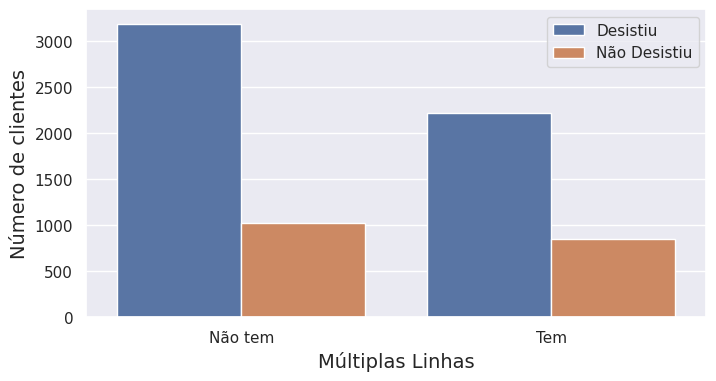

In [77]:
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid")
ax = sns.countplot(dados_telecomx, x="MultipleLines", hue="Churn")

handles, labels = ax.get_legend_handles_labels()
nova_legenda2 = ['Desistiu', 'Não Desistiu']

ax.set_xlabel('Múltiplas Linhas', fontsize=14)
ax.set_ylabel('Número de clientes', fontsize=14)
ax.xaxis.set_ticklabels(['Não tem','Tem'])

plt.savefig('multiplelines.png', dpi=300)
plt.legend(handles=handles, labels=nova_legenda2)

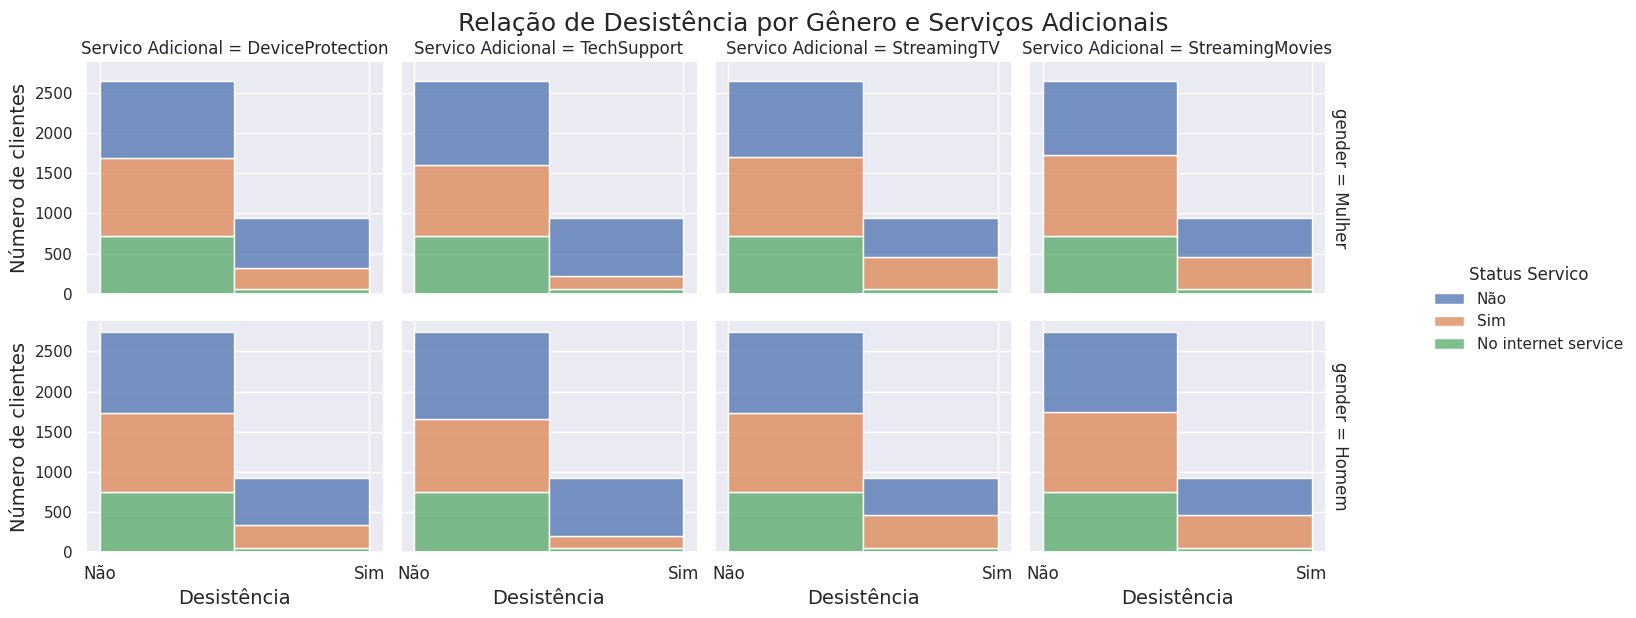

In [78]:
#Colunas desejadas:
cols_de_servico = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

#Cópia que será usada:
df_para_displot = dados_telecomx_binarios.copy()
for col in cols_de_servico:
    df_para_displot[col] = df_para_displot[col].apply(lambda x: 'Sim' if x == 'Yes' else ('Não' if x == 'No' else x))

df_melted = pd.melt(df_para_displot,
                    id_vars=['Churn', 'gender'],
                    value_vars=cols_de_servico,
                    var_name='Servico Adicional',
                    value_name='Status Servico')

sns.set_theme(style="darkgrid")
ax = sns.displot(
    df_melted,
    x="Churn",
    col="Servico Adicional",
    row="gender",
    hue="Status Servico",
    kind="hist",
    multiple="stack",
    binwidth=0.6,
    height=3,
    aspect=1.2,
    facet_kws=dict(margin_titles=True),
)

ax.set(xticks=[0,1])
for sub_ax in ax.axes.flat:
    sub_ax.set_xticklabels(['Não','Sim'], fontsize=12)
    sub_ax.set_ylabel('Número de clientes', fontsize=14)
    sub_ax.set_xlabel('Desistência', fontsize=14)

ax.savefig('desistenciageneroservicosadicionais.png', dpi=300)
plt.suptitle('Relação de Desistência por Gênero e Serviços Adicionais', y=1.02, fontsize=18)
plt.show()

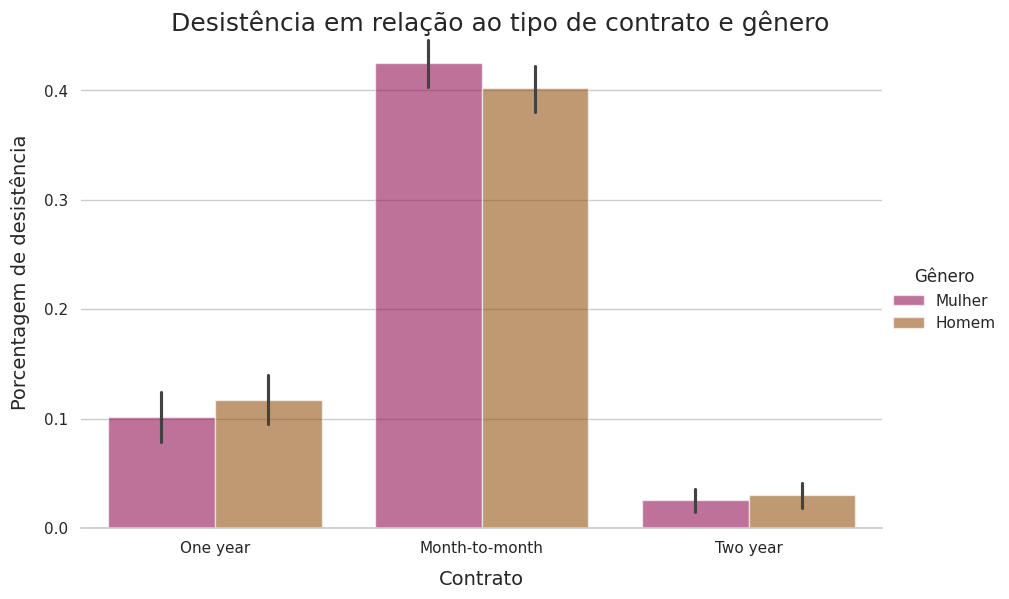

In [79]:
sns.set_theme(style='whitegrid')
p = sns.catplot(kind='bar', data=dados_telecomx_binarios, x='Contract', y='Churn', hue='gender', palette="brg", alpha=.6, height=6, aspect=1.5)
p.fig.suptitle('Desistência em relação ao tipo de contrato e gênero', fontsize=18)

p.set_axis_labels("Contrato", "Porcentagem de desistência", fontsize=14, labelpad=10)
p.legend.set_title("Gênero")

p.savefig('contratogenero.png', dpi=300)
p.despine(left=True)
plt.show()

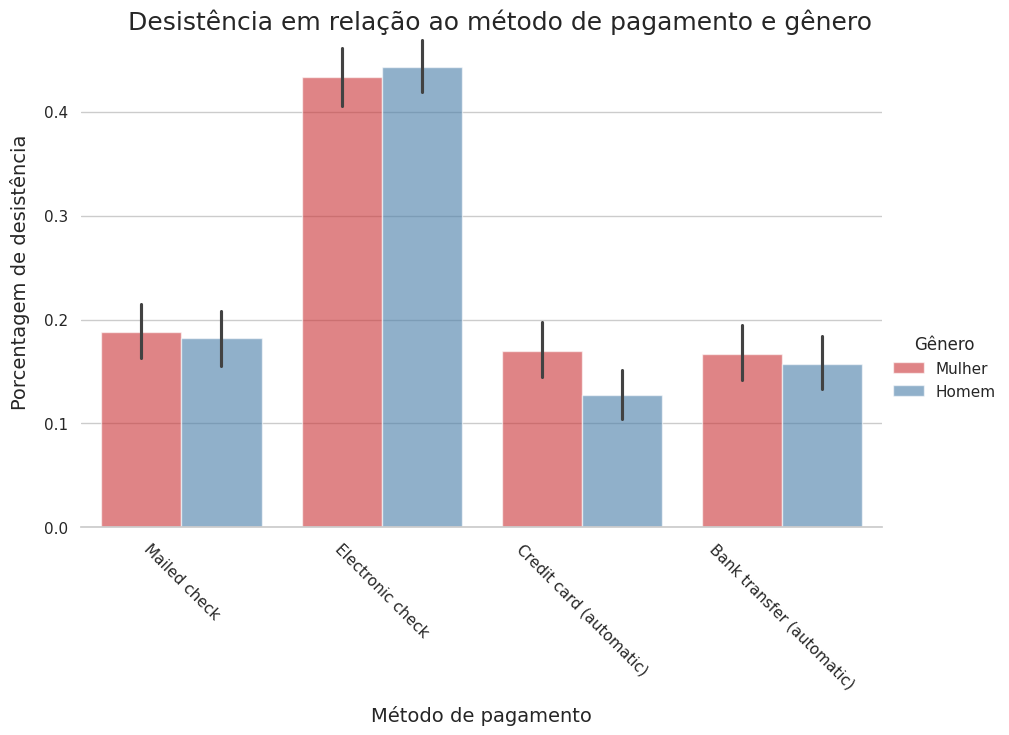

In [80]:
sns.set_theme(style='whitegrid')
p = sns.catplot(kind='bar', data=dados_telecomx_binarios, x='PaymentMethod', y='Churn', hue='gender', palette="Set1", alpha=.6, height=6, aspect=1.5)
p.fig.suptitle('Desistência em relação ao método de pagamento e gênero', fontsize=18)

p.set_axis_labels("Método de pagamento", "Porcentagem de desistência", fontsize=14, labelpad=10)
p.legend.set_title("Gênero")


plt.xticks(rotation=-45)
p.savefig('pagamentogenero.png', dpi=300)
p.despine(left=True)
plt.show()

<Axes: >

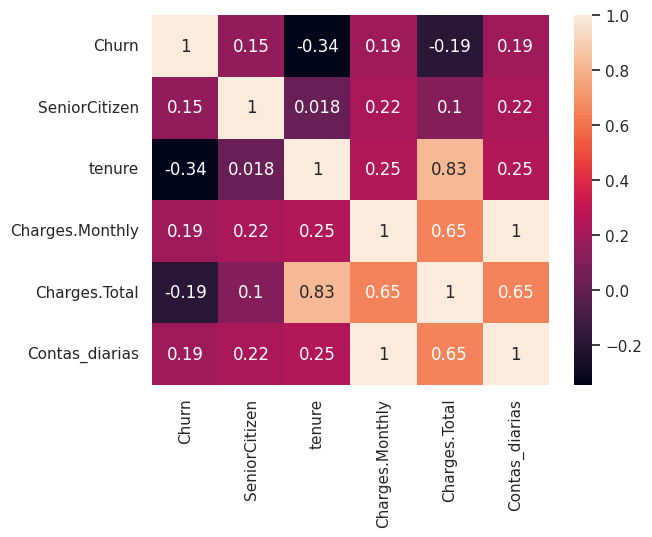

In [81]:
cols_binarias = ['Churn', 'SeniorCitizen', 'Partner', 'Dependents']

df_corr = dados_telecomx_binarios.copy()
for col in cols_binarias:
    df_corr[col] = df_corr[col].apply(lambda x: 1 if x == True else (0 if x == False else x))
df_corr = df_corr.select_dtypes(['number']).corr()
sns.heatmap(data=df_corr, annot=True)

#📄Relatorio Final

# Introdução

A TelecomX enfrenta um alto índice de cancelamentos (26%) e precisa entender os fatores que levam à perda de clientes. Essa análise teve como principal objetivo atender à essa demanda. Para tanto, foram analisados dados dos clientes para identificar padrões que poderiam guiar outros setores da empresa à tomada de decisão e ações pontuais, como campanhas.

# Limpeza e Tratamento de dados:

Primeiramente realizei a normalização dos dados após a exportação do arquivo JSON e a exclusão das colunas aninhadas. Posteriormente, verifiquei os tipos de dados presentes no DataFrame e constatei que a coluna "Charges.Total", referente aos gastos totais do cliente até então, não constava como dado numérico. Após inspeção, averiguei que algumas células estavam vazias. Para tratar isso, substituí o conteúdo das células vazias pelo NaN (Not A Number) e depois de converter para Float64 me desfiz dos valores nulos com o dropna.

Além disso, também verifiquei a existência de valores nulos nas colunas "SeniorCitizen" e "Charges.Monthly" e se existiam clientes repetidos na coluna "CostumerID".

Depois dessas verificações, criei uma coluna para representar os gastos diários do cliente, chamada "Contas_Diarias".

Por último, após constatar quais seriam as colunas mais interessantes para análise, converti as colunas categórias "Partner", "Dependents", "MultipleLines" e "Churn" para colunas binárias (True ou False) para poder realizar contagens.

# Análise Exploratória de Dados:
Primeiramente, foi realizei uma análise do perfil demográfico dos clientes. Verifiquei que 30% possuem dependentes e 48% têm parceiros. Esses dados podem ser interessantes, pois representam uma possibilidade de dependência que diminuiria a desistência do plano. Isso foi confirmado através dos seguintes gráficos:
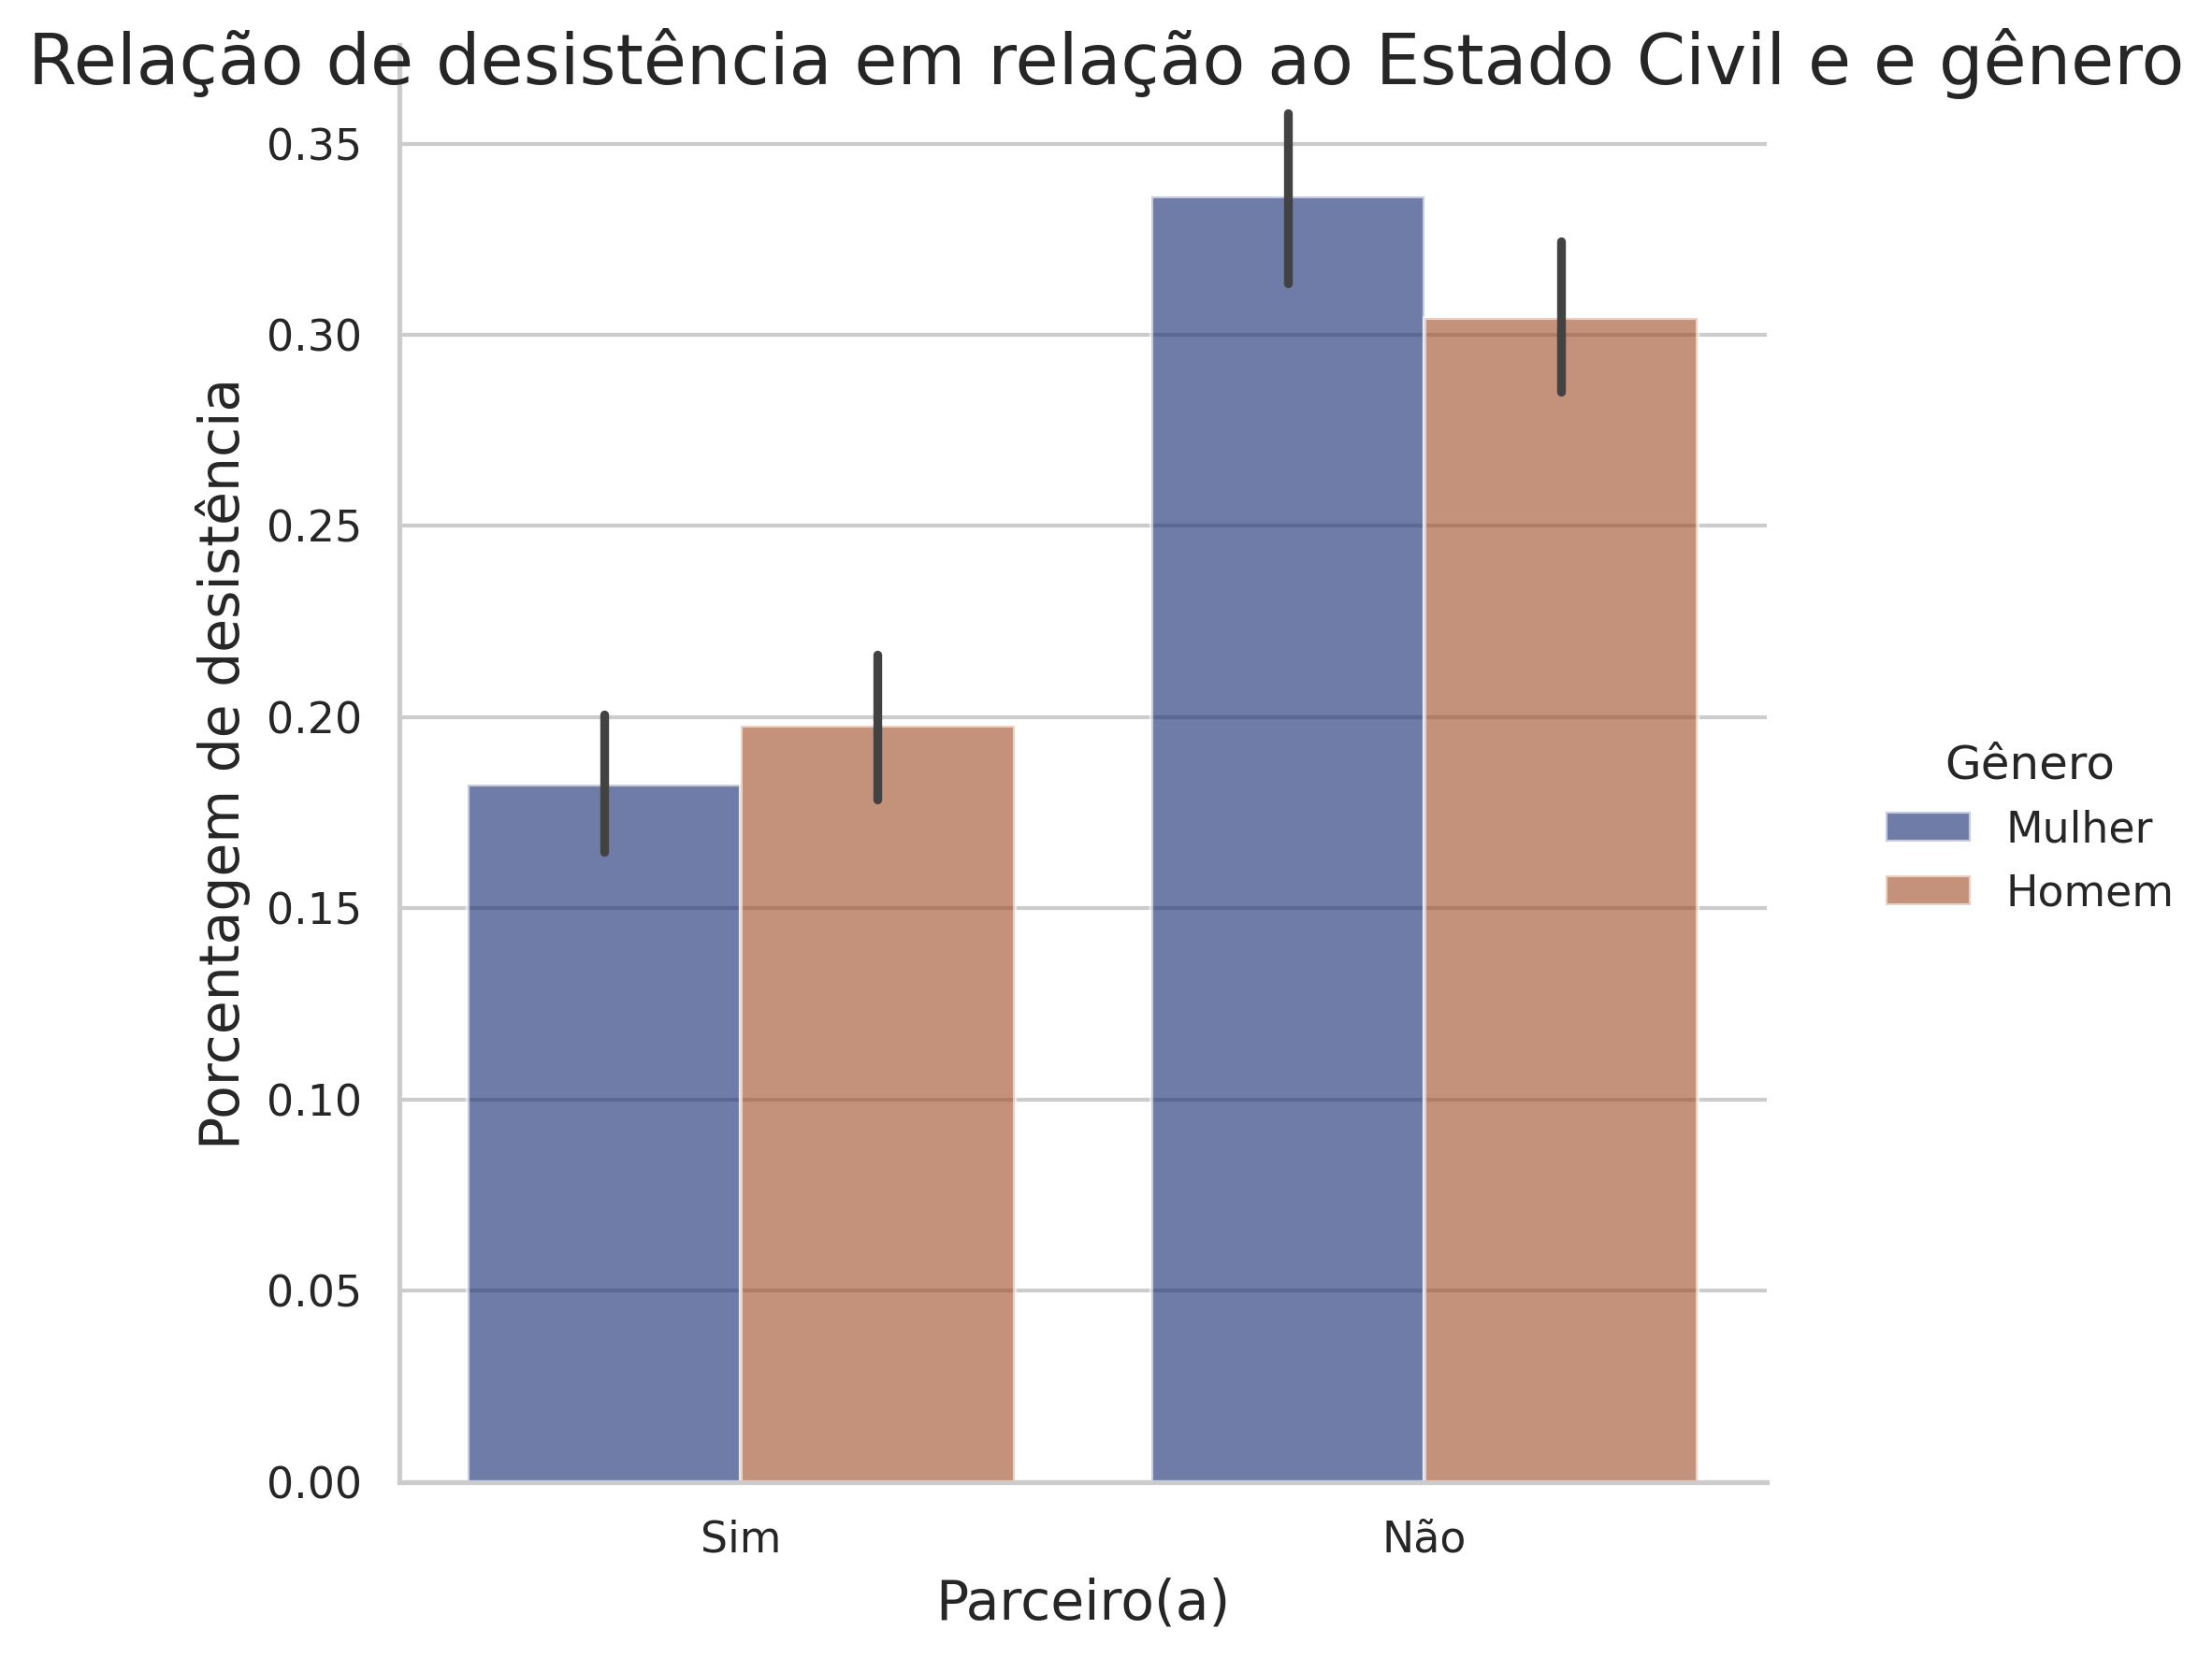
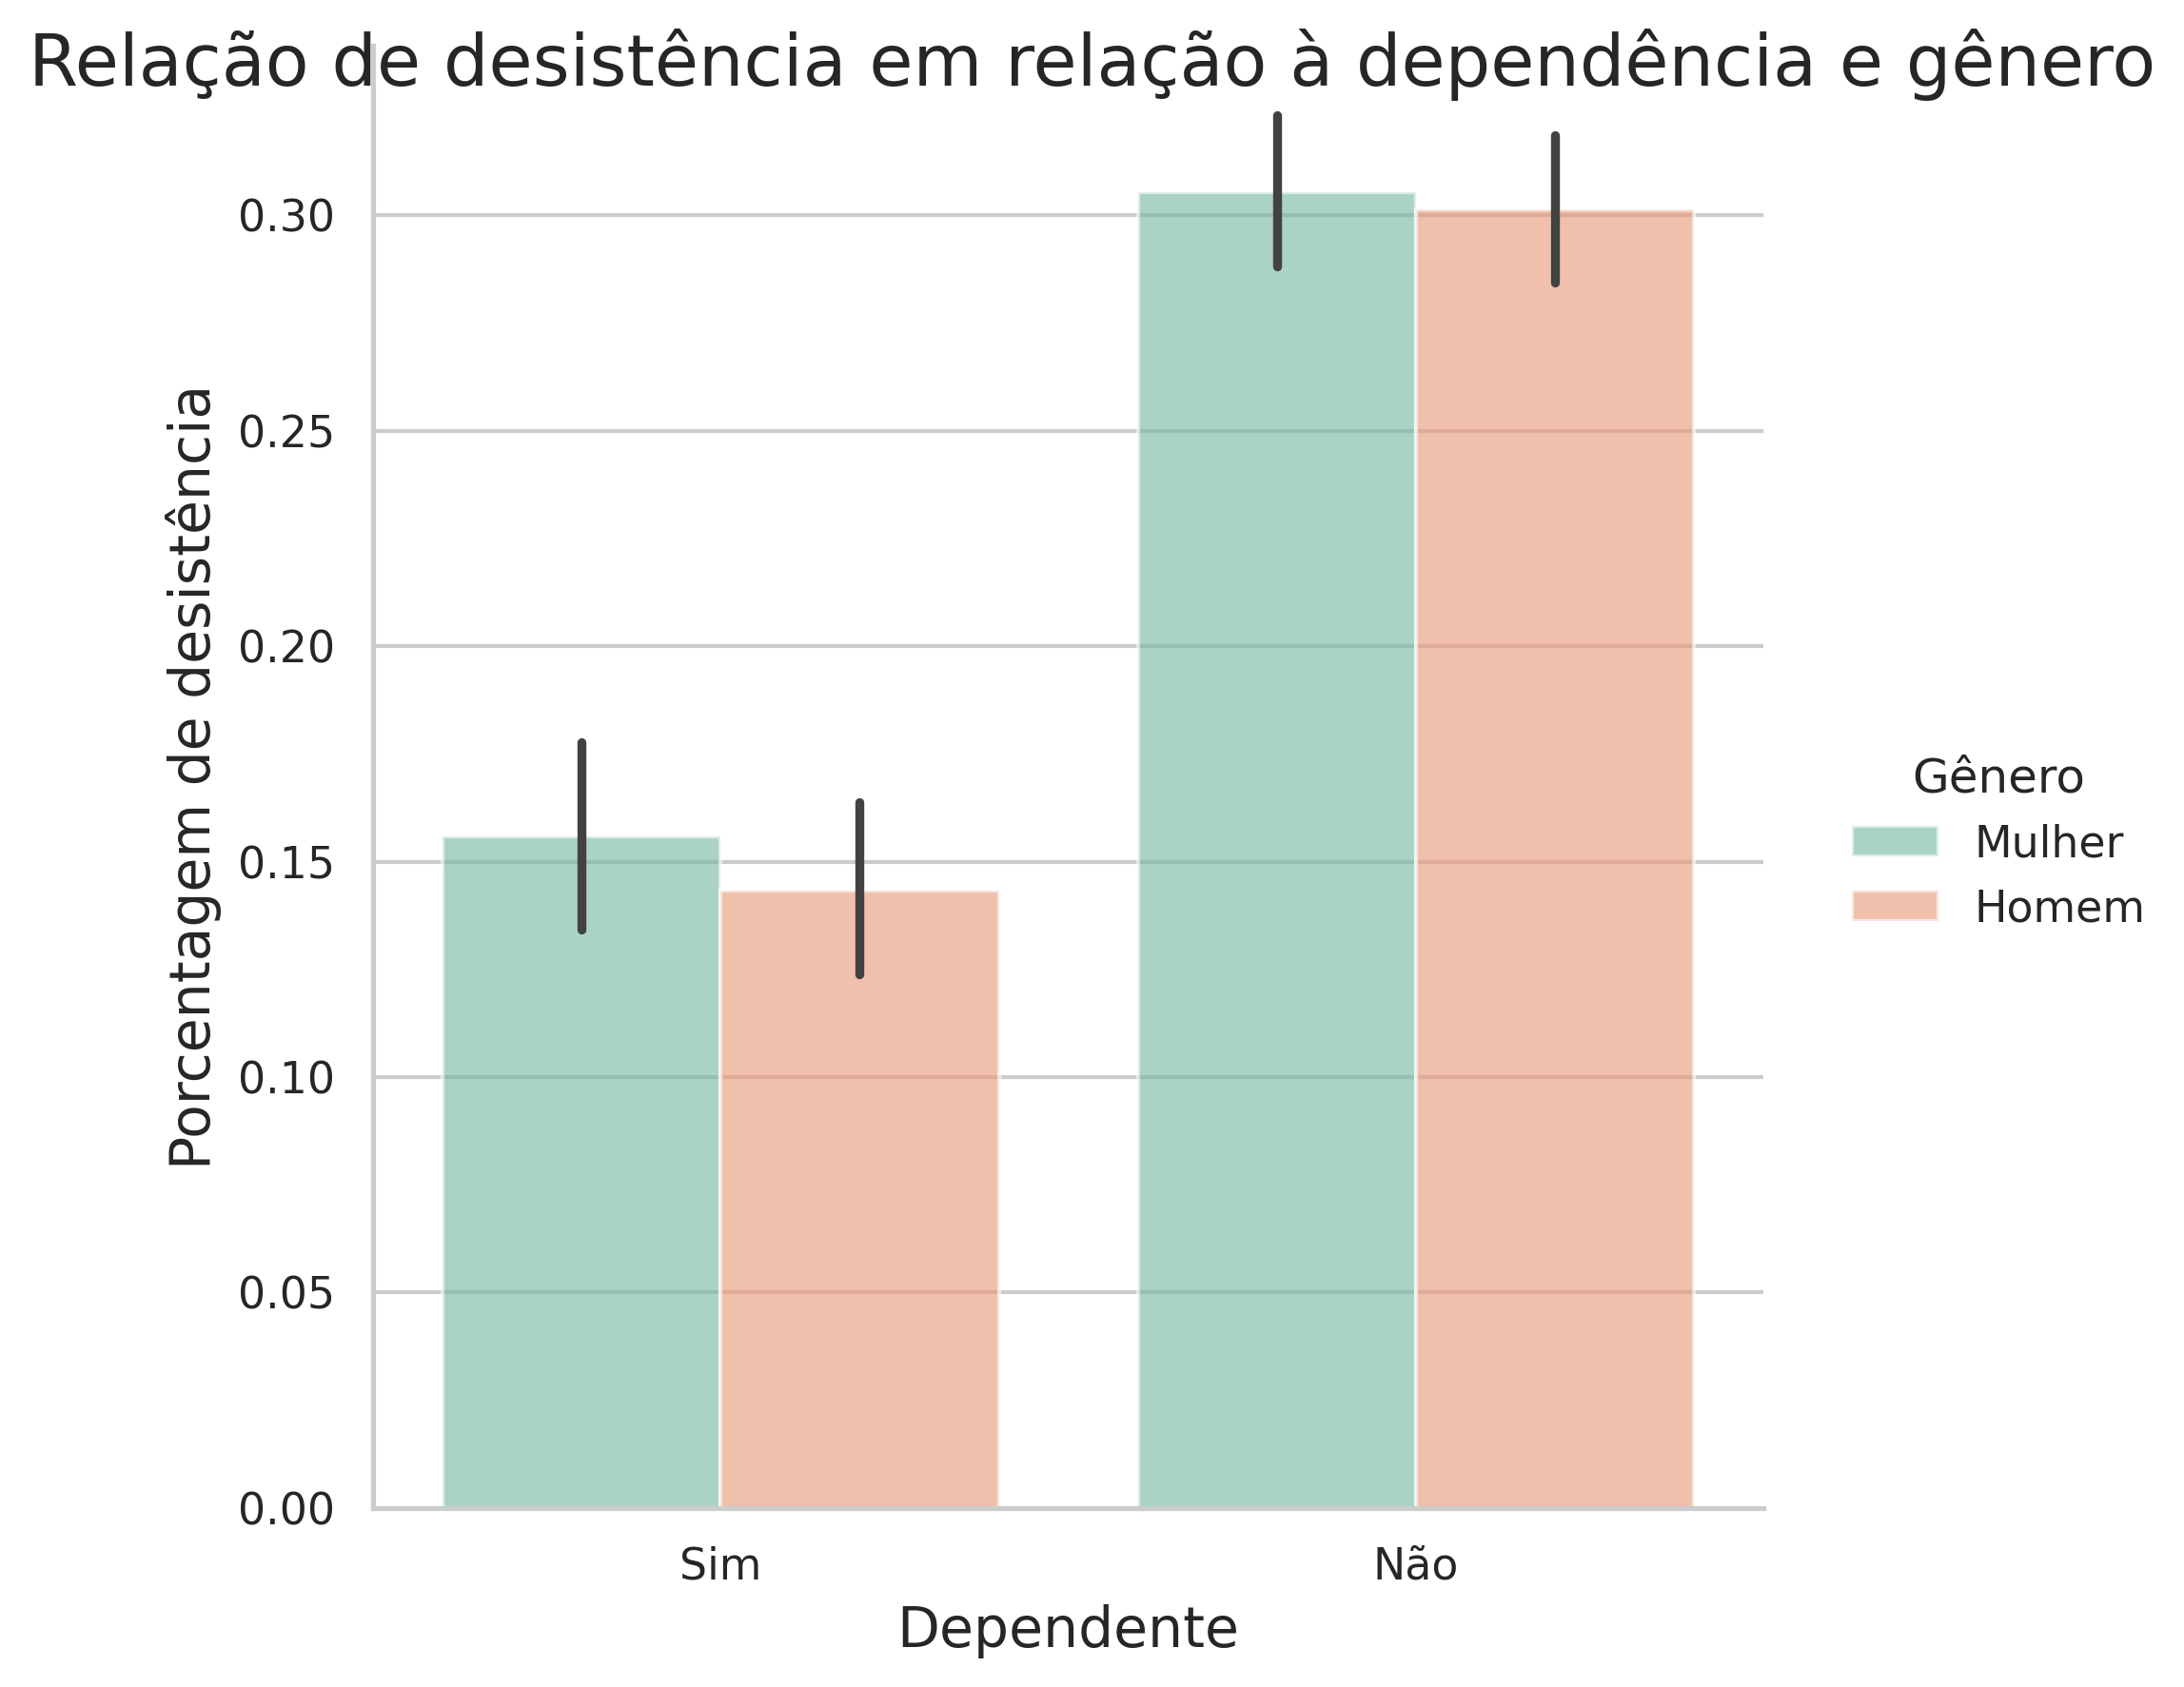

Como demonstrado pelos gráficos acima, a desistência é muito maior entre clientes que não têm dependentes e nem parceiros, independente do gênero.

Outra questão notável foi que idosos concentram os maiores gastos mensais. E que as desistências estão concentradas nas maiores faixas de gastos mensais, enquanto não idosos com gastos menores concentram menos desistências. Isso é observável no gráfico a seguir: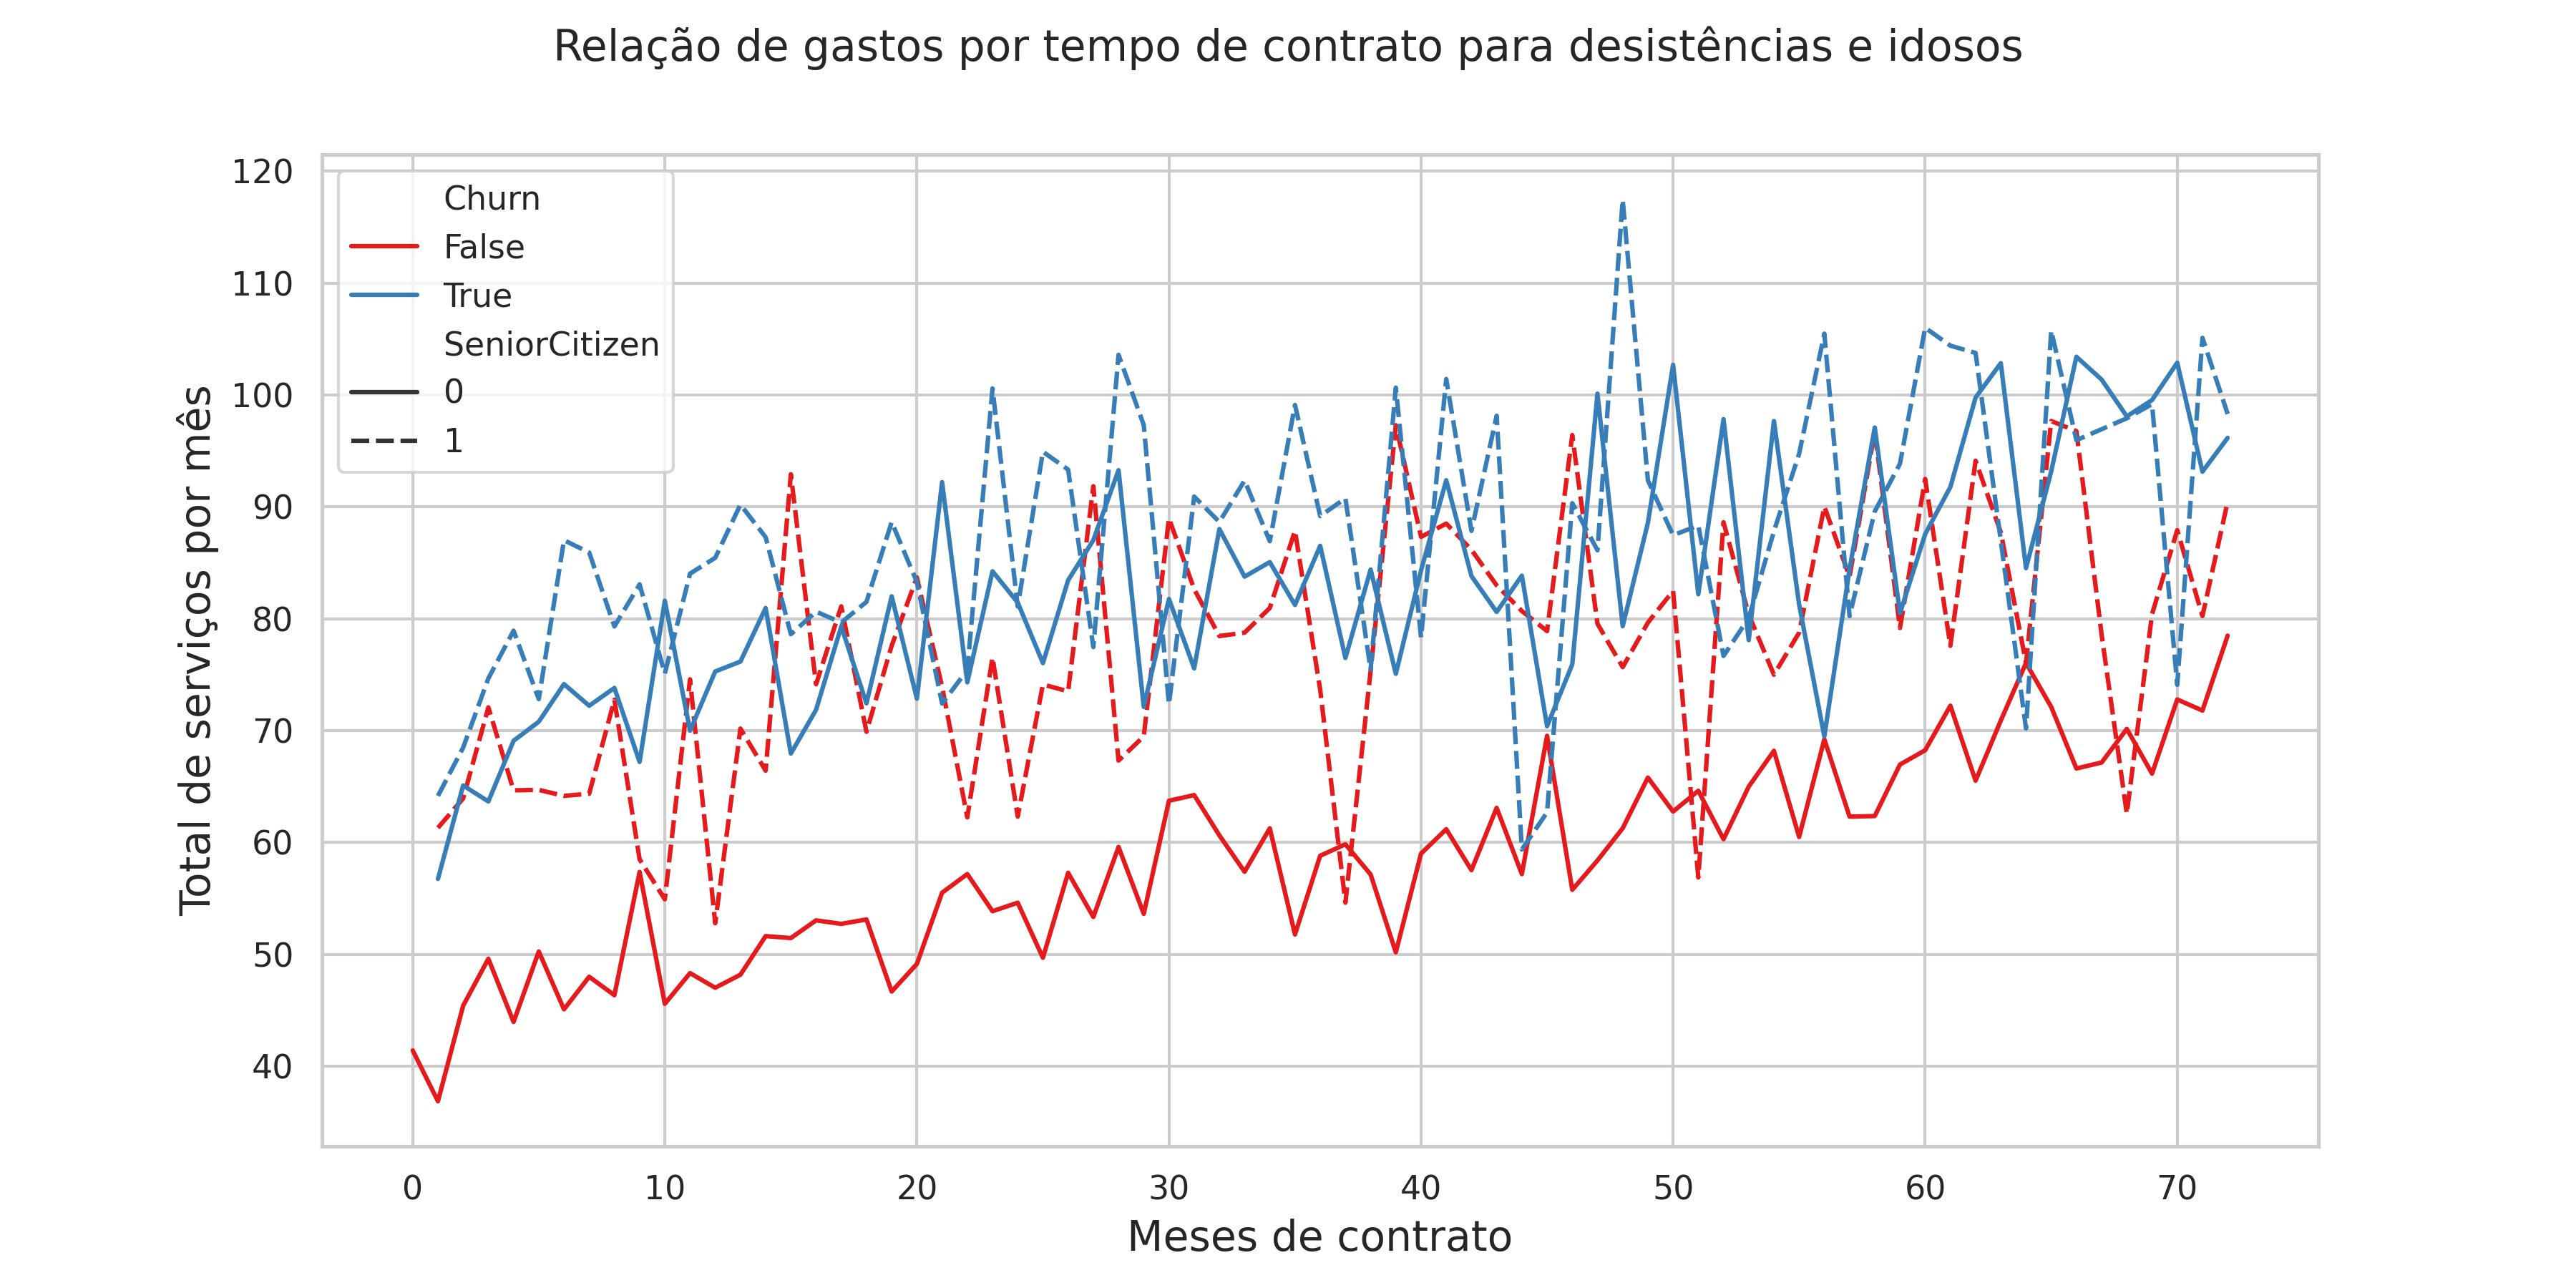

Verificando a desistência em relação ao contrato e método de pagamento, observei que clientes com "Cheque eletrônico" têm uma taxa alta de cancelamento, passando dos 40%, independdente do gênero. Quase o dobro de outros métodos de pagamento.

Junto a isso, clientes com contrato bianual tem uma taxa de cancelamento baixíssima (abaixo de 5%), enquanto clientes com planos anuais cancelam mais (10%) e 40% dos clientes com planos mensais cancelaram! Um gargalo enorme.

Essas observações podem ser vistas nos gráficos a seguir.

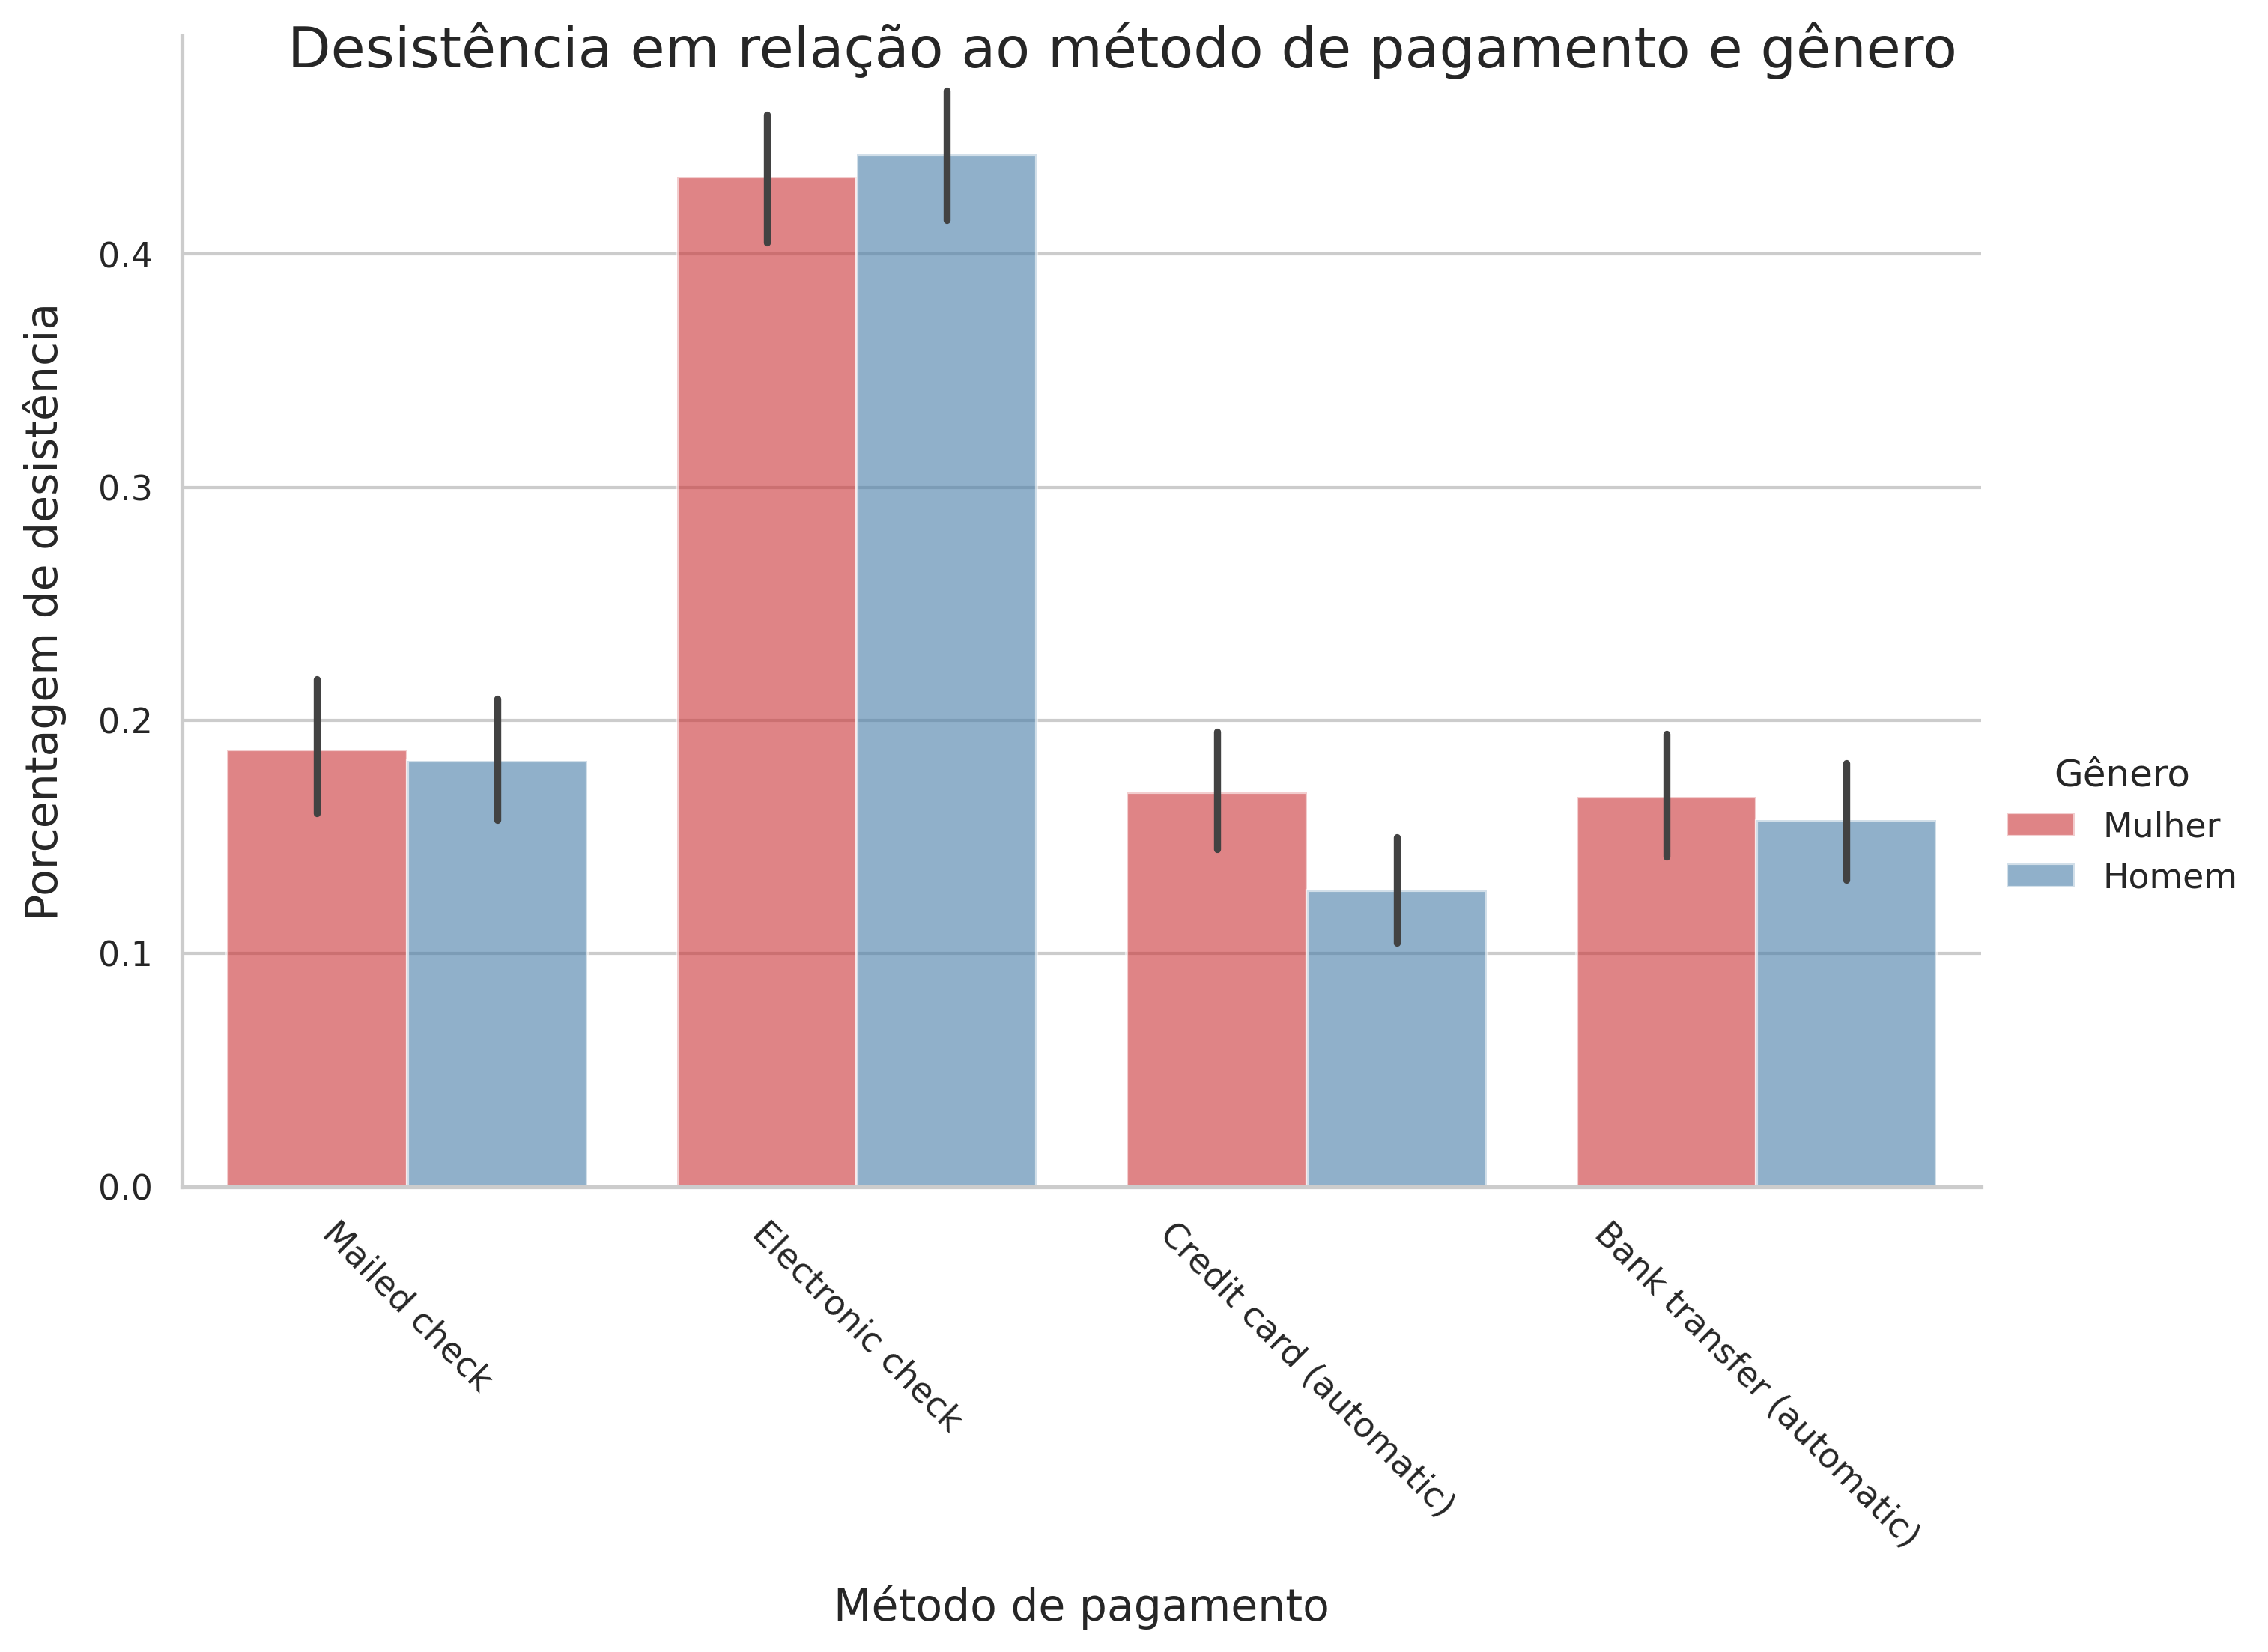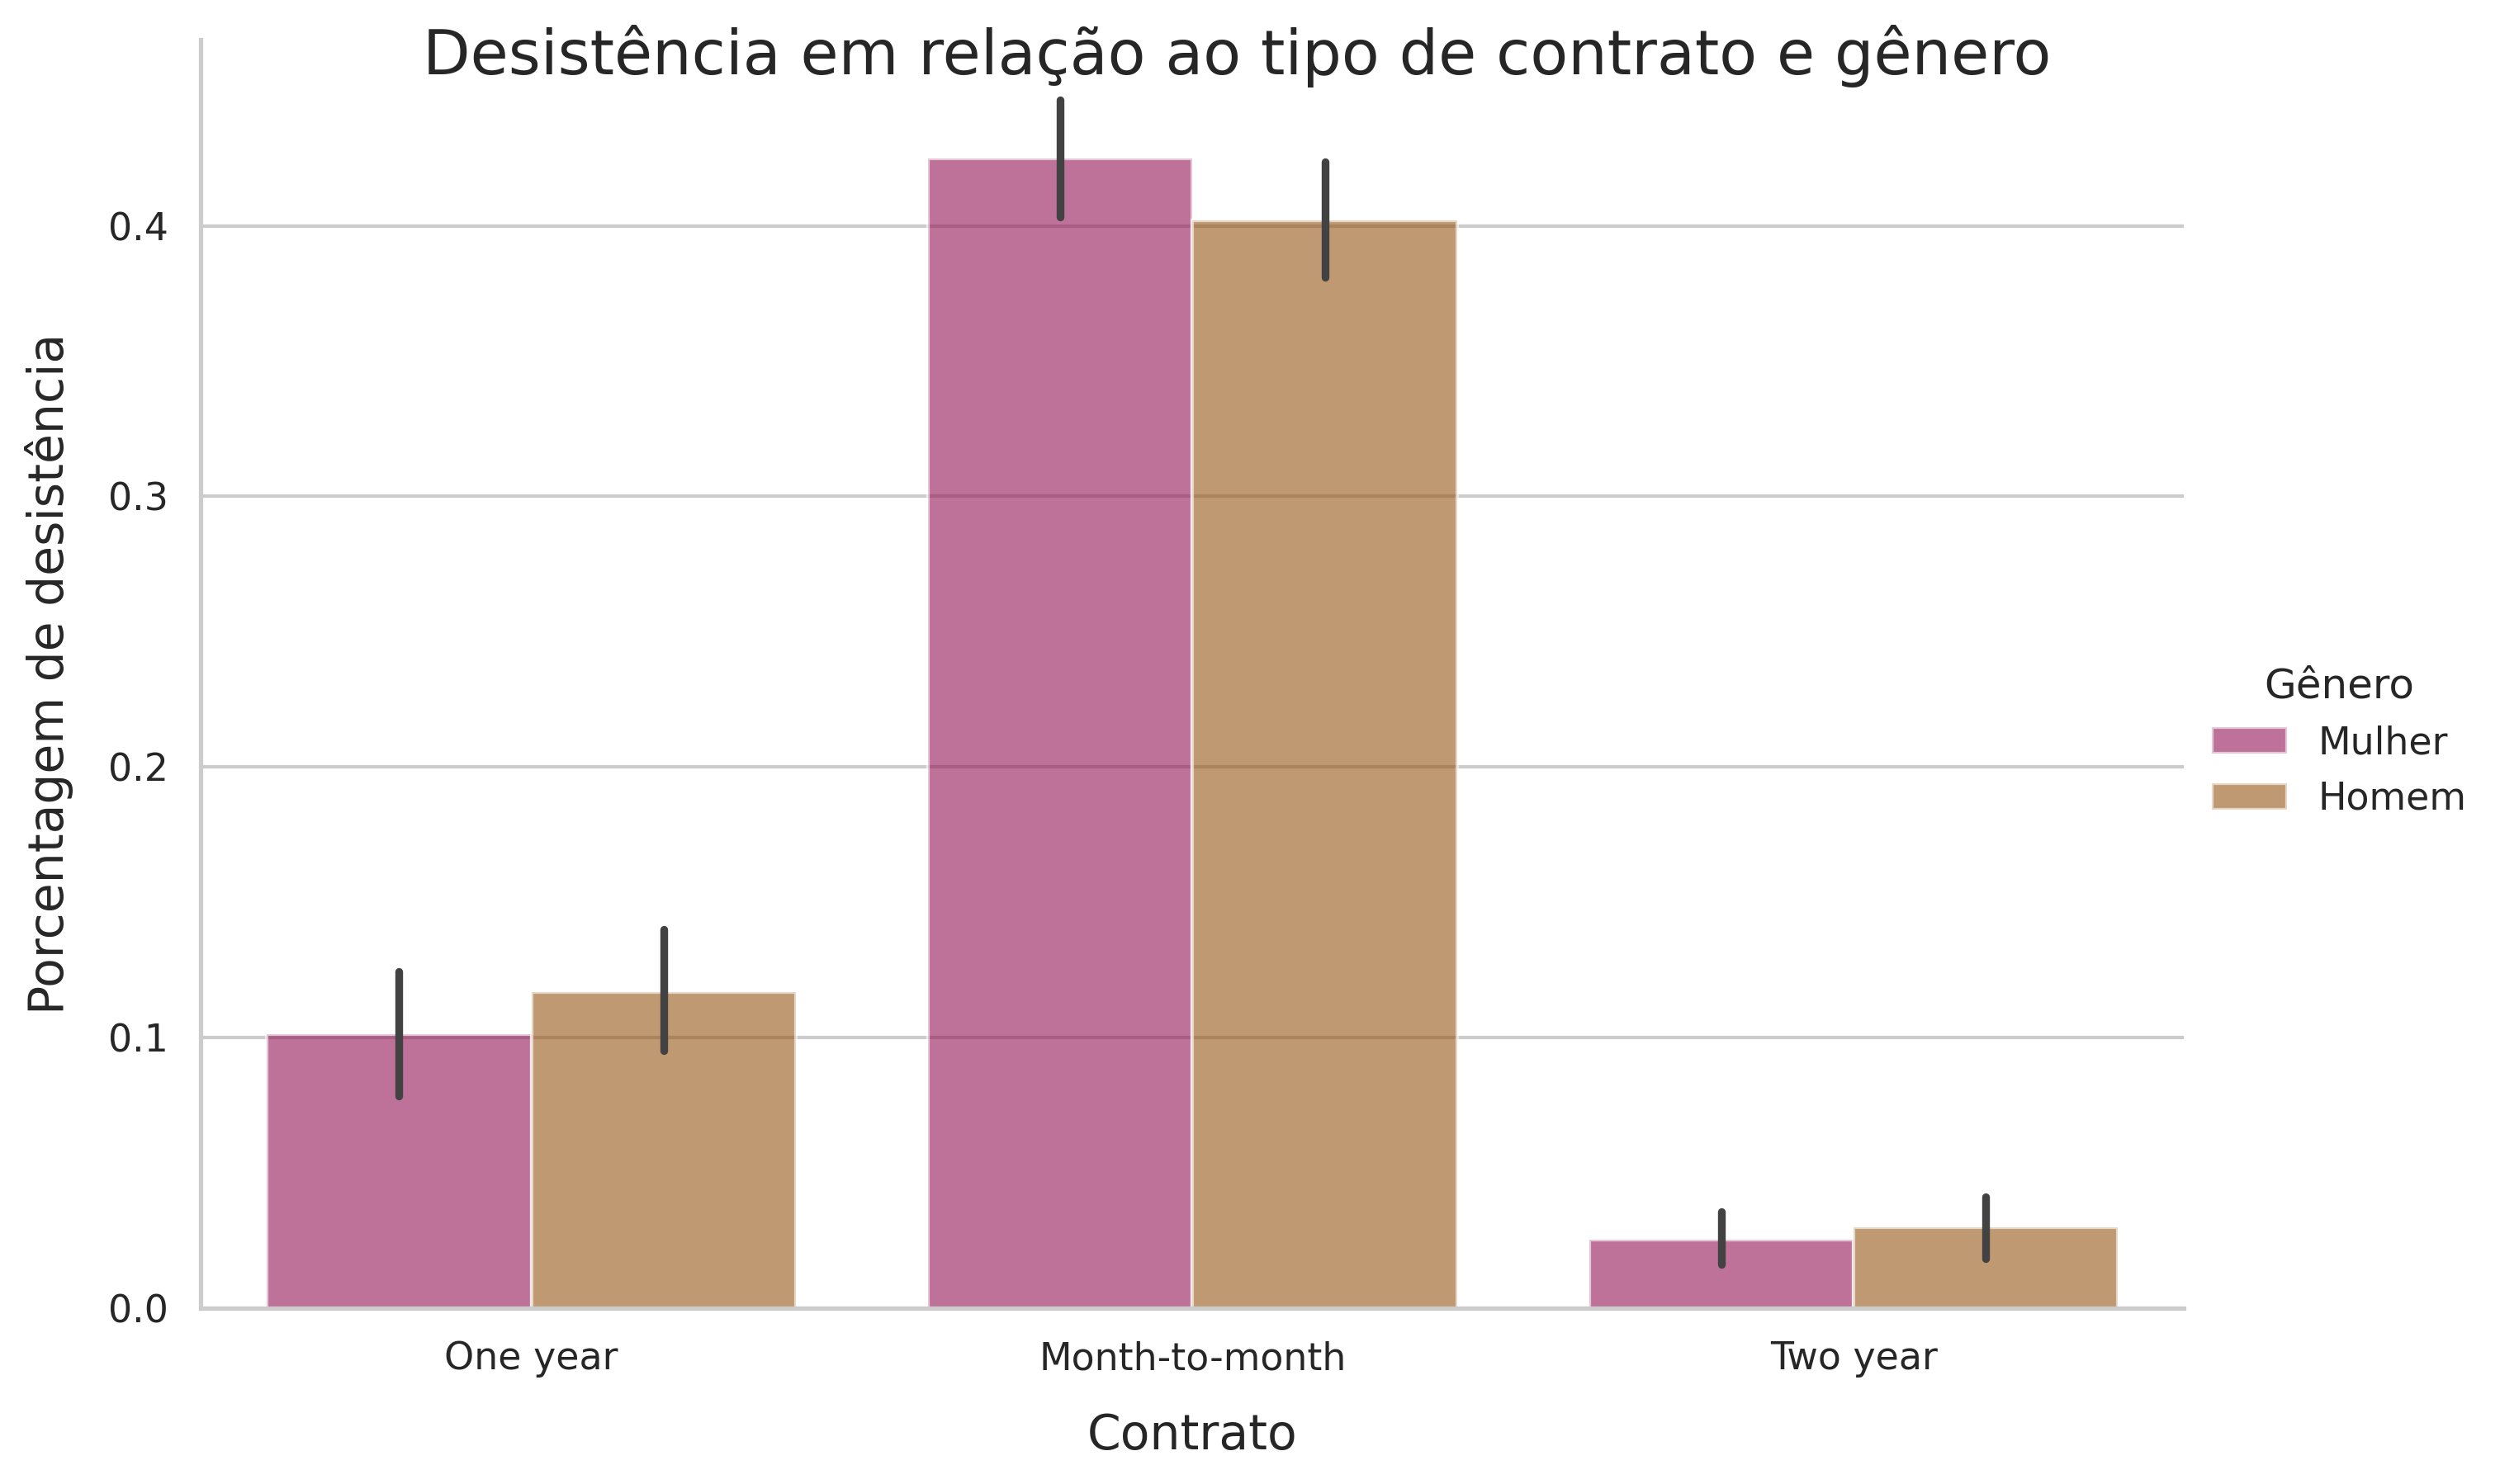

Por último, realizei uma análise da relação da desistência com contratação de outros serviços. Constatei que clientes que abandonam o serviço geralmente não têm serviços acoplados, que poderiam funcionar como uma "cola", da mesma forma que dependentes e parceiros. Isso pode ser observado no seguinte gráfico:
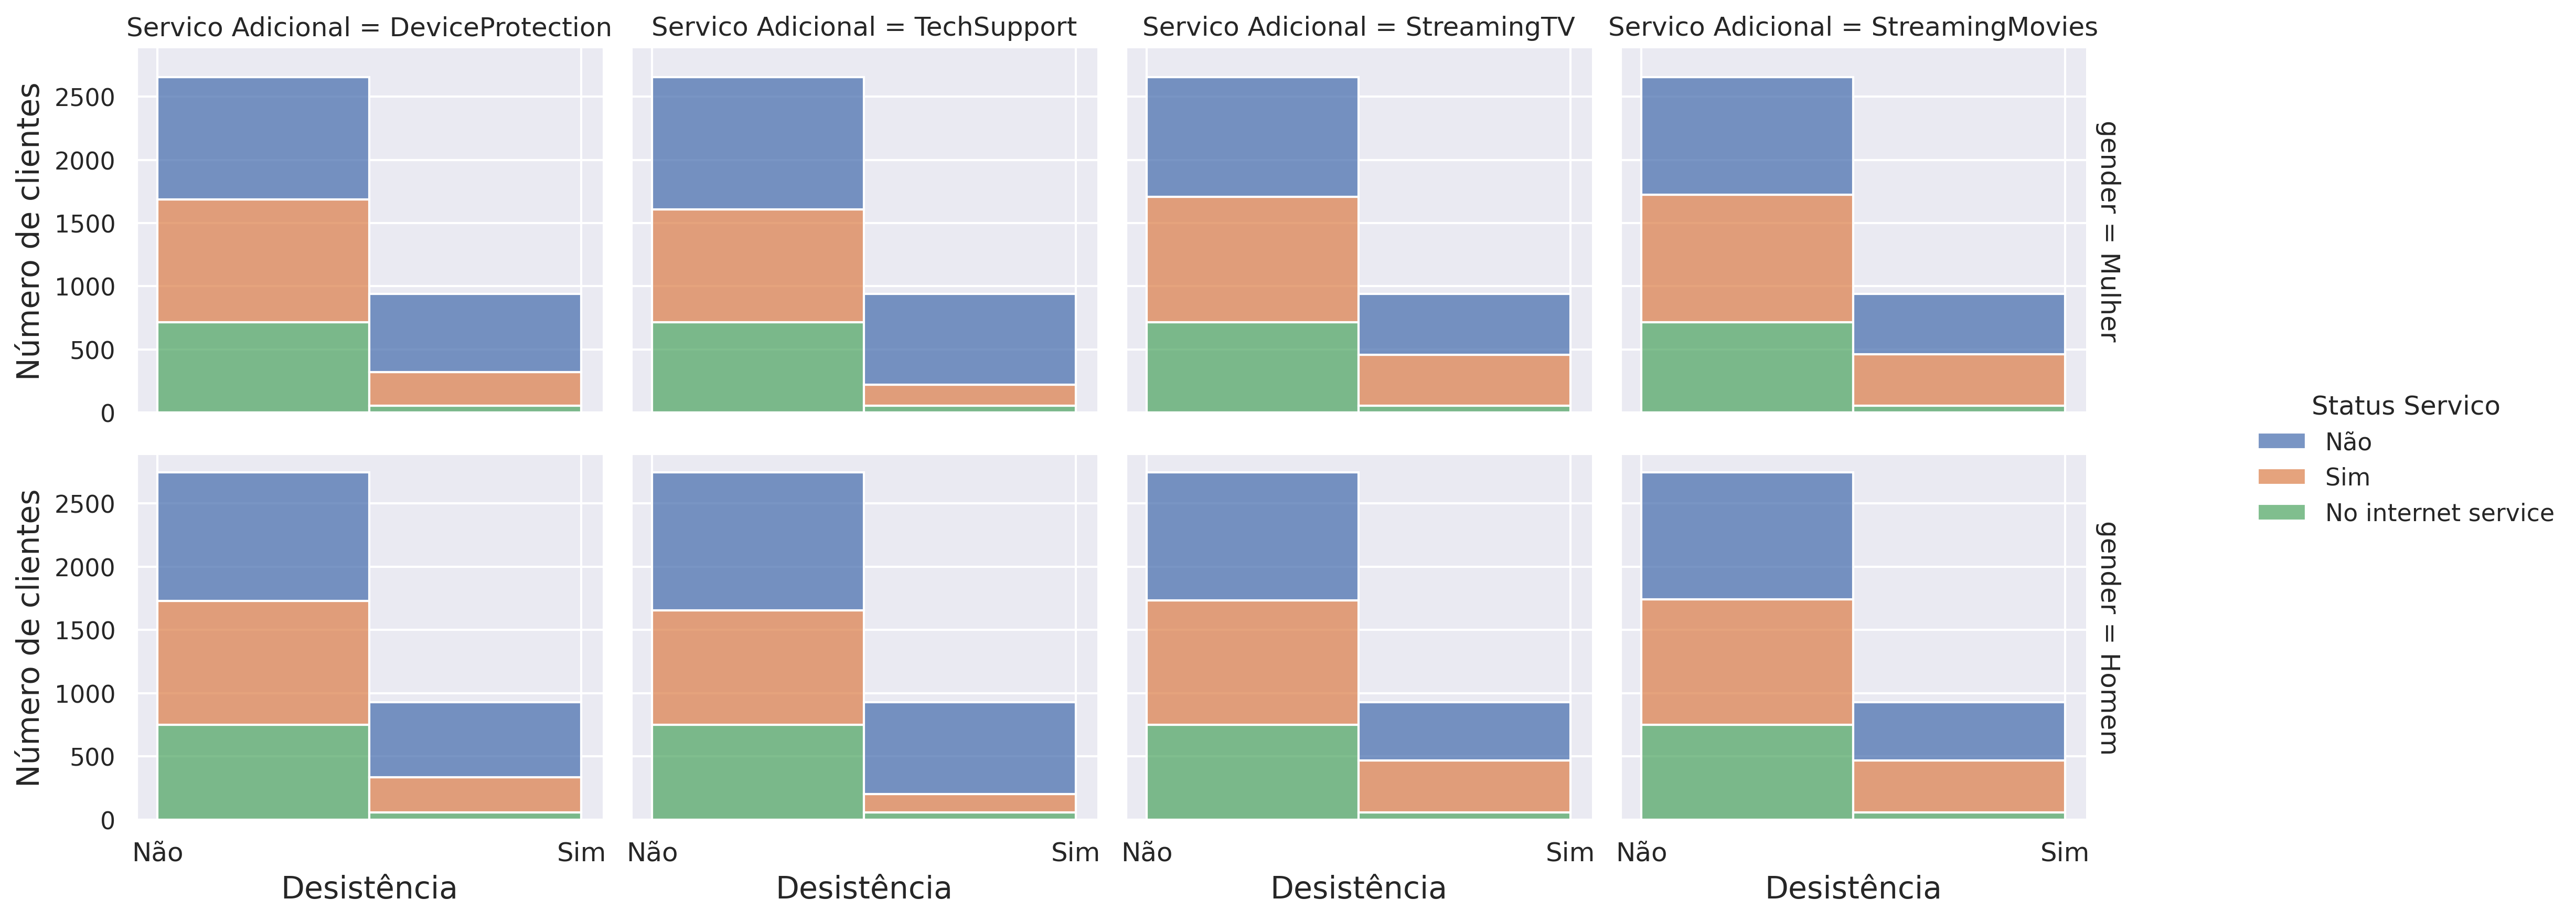

# Conclusões:

A falta de fidelidade é o maior gargalo. Os clientes com contratos mensais concentram 40% de desistências, em comparação com contratos bianuais que concentram 5%. Assim, o cliente que não tem um contrato maior sai na primeira insatisfação.

Outro gargalo é o método de pagamento. Métodos de pagamento automáticos como cartão ou transferência bancária têm uma taxa de cancelamento muito menor do que métodos como cheque eletrônico (40%). Isso pode indicar algum problema na experiência dos clientes.

O gênero não é um fator determinante no cancelamento. Embora haja diferenças, elas são mínimas. As principais diferenças costumam vir de outras categorias, como ter ou não dependentes e/ou parceiros. Isso provavelmente decorre do inconveniente gerado pelo cancelamento para mais de uma pessoa, o que pode fazer a pessoa desistir.

Por último, a criação de um ambiente de serviços integrados pode diminuir a desistência. Clientes com mais serviços podem se sentir menos compelidos a desistir na primeira insatisfação, visto a integração de várias esferas da sua vida com o serviço.

# Recomendações:

Como os maiores gastos concentram as desistências, uma oportunidade de campanha é a migração de planos mensais para anuais ou bianuais oferecendo descontos. Isso acertaria em dois lados, o dos gastos e o do tipo de contrato, ajudando a reduzir a desistência.

Necessário também ter atenção com o método do pagamento e verificar se está ocorrendo algum problema. É possível incentivar os clientes a adotar o débito automático, o que reduz a desistência.

Por último, pacotes que incluam serviços adicionais por um valor menor para novos clientes seria uma oportunidade de expandir o número de clientes e aumentar sua fidelidade.